In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [34]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [29]:
print(train_images_with_noise_channels)
train_images_with_noise_channels[0, :200]

[[0.         0.         0.         ... 0.18624658 0.21175248 0.54299586]
 [0.         0.         0.         ... 0.72141331 0.56406465 0.31507373]
 [0.         0.         0.         ... 0.38202324 0.35369736 0.31077661]
 ...
 [0.         0.         0.         ... 0.54151593 0.87991833 0.13478373]
 [0.         0.         0.         ... 0.17056047 0.62787532 0.36183202]
 [0.         0.         0.         ... 0.66641559 0.80412243 0.07055938]]


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [30]:
print(train_images_with_zeros_channels)
train_images_with_zeros_channels[0, :200]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [35]:
def get_model() :
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [36]:
model = get_model()

history_noise = model.fit(train_images_with_noise_channels, train_labels,
                          epochs=10,
                          batch_size=128,
                          validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 8s 18ms/step - loss: 2.3574 - accuracy: 0.1058 - val_loss: 2.3079 - val_accuracy: 0.1048
Epoch 2/10
375/375 [==============================] - 6s 17ms/step - loss: 2.3026 - accuracy: 0.1105 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 3/10
375/375 [==============================] - 7s 19ms/step - loss: 2.3016 - accuracy: 0.1129 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 2.3007 - accuracy: 0.1138 - val_loss: 2.3052 - val_accuracy: 0.1060
Epoch 5/10
375/375 [==============================] - 9s 24ms/step - loss: 2.2999 - accuracy: 0.1153 - val_loss: 2.3044 - val_accuracy: 0.1063
Epoch 6/10
375/375 [==============================] - 8s 21ms/step - loss: 2.2989 - accuracy: 0.1154 - val_loss: 2.3043 - val_accuracy: 0.1067
Epoch 7/10
375/375 [==============================] - 8s 20ms/step - loss: 2.2978 - accuracy: 0.1175 - val_loss: 2.3030 - val_accuracy: 0.1029

In [23]:
model = get_model()

history_zeros = model.fit(train_images_with_zeros_channels, train_labels,
                          epochs=10,
                          batch_size=128,
                          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 18ms/step - loss: 1.6673 - accuracy: 0.6193 - val_loss: 0.9893 - val_accuracy: 0.8043
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 0.7382 - accuracy: 0.8221 - val_loss: 0.5369 - val_accuracy: 0.8690
Epoch 3/10
375/375 [==============================] - 8s 20ms/step - loss: 0.4890 - accuracy: 0.8719 - val_loss: 0.4049 - val_accuracy: 0.8933
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.4022 - accuracy: 0.8901 - val_loss: 0.3534 - val_accuracy: 0.9023
Epoch 5/10
375/375 [==============================] - 7s 19ms/step - loss: 0.3606 - accuracy: 0.8989 - val_loss: 0.3239 - val_accuracy: 0.9093
Epoch 6/10
375/375 [==============================] - 7s 19ms/step - loss: 0.3355 - accuracy: 0.9047 - val_loss: 0.3056 - val_accuracy: 0.9120
Epoch 7/10
375/375 [==============================] - 7s 19ms/step - loss: 0.3183 - accuracy: 0.9084 - val_loss: 0.2919 - val_accuracy: 0.9172

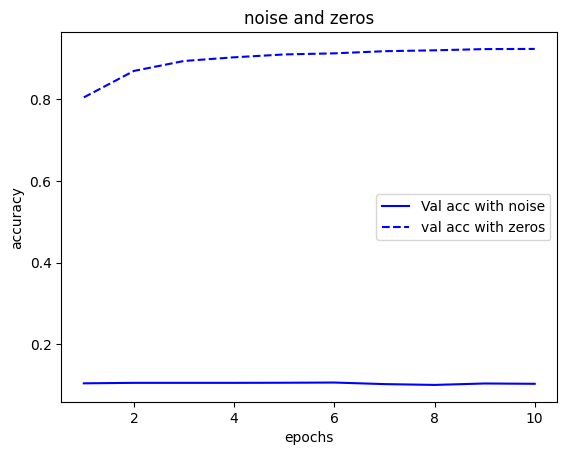

In [37]:
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']

epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-", label="Val acc with noise")
plt.plot(epochs, val_acc_zeros, "b--", label='val acc with zeros')
plt.title('noise and zeros')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()